In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("fifa_data.json")

In [3]:
df = df.transpose()

In [4]:
df["Position"].unique()

array(['LW', 'RF', 'ST', 'CF', 'RW', 'GK', 'LDM', 'Sub', 'CB', 'CDM',
       'CAM', 'LCB', 'Res', 'LCM', 'RCM', 'RB', 'LS', 'RCB', 'LWB', 'RS',
       'LB', 'RDM', 'RM', 'LM', 'CM', 'LF', 'RWB', 'RAM', 'LAM'],
      dtype=object)

In [5]:
df["Position"].value_counts()

Sub    7822
Res    2875
RCB     664
LCB     661
GK      645
RB      478
LB      469
RCM     463
LCM     462
ST      451
RM      399
LM      391
CAM     274
CDM     245
RS      204
LS      203
CB      189
RDM     189
LDM     188
RW      169
LW      167
LWB     124
RWB     124
RF       31
LF       30
CM       26
LAM      11
CF       10
RAM      10
Name: Position, dtype: int64

In [6]:
df[df["Position"]=="Res"].head()

,Height,Weight,Preferred Foot,Birth Date,Age,Preferred Positions,Player Work Rate,Weak Foot,Skill Moves,Position,...,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,On loan from
N'Golo Kanté,168 cm,70 kg,Right,"March 29, 1991",31,"[CDM, CM]",Medium / High,3,2,Res,...,49,49,54,56,7,15,12,10,10,NaN
Édouard Mendy,197 cm,86 kg,Right,"March 1, 1992",31,GK,Medium / Medium,2,1,Res,...,13,14,13,9,83,83,82,81,86,NaN
Diogo Jota,178 cm,73 kg,Right,"Dec. 4, 1996",26,"[CF, LW]",High / High,5,4,Res,...,77,58,69,79,9,7,12,15,11,NaN
Lucas Hernández,184 cm,79 kg,Left,"Feb. 14, 1996",27,"[CB, LB]",Medium / Medium,2,2,Res,...,59,39,42,46,14,10,7,8,10,NaN
Ben Chilwell,180 cm,77 kg,Left,"Dec. 21, 1996",26,"[LWB, LB]",High / Medium,3,3,Res,...,71,67,52,65,7,10,7,14,10,NaN


In [7]:
df["Preferred Positions"].loc[df["Position"]=="Res"]

N'Golo Kanté       [CDM, CM]
Édouard Mendy             GK
Diogo Jota          [CF, LW]
Lucas Hernández     [CB, LB]
Ben Chilwell       [LWB, LB]
                     ...    
Akshunna Tyagi            ST
Wu Junjie                 LB
Zhao Ziye                 RW
Deven Sawhney             LB
Nathan Logue              CM
Name: Preferred Positions, Length: 2875, dtype: object

In [8]:
df["Height"]=df["Height"].apply(lambda x: int(x.split(" ")[0]))

In [9]:
df["Weight"]=df["Weight"].apply(lambda x: int(x.split(" ")[0]))

In [10]:
df.columns

Index(['Height', 'Weight', 'Preferred Foot', 'Birth Date', 'Age',
       'Preferred Positions', 'Player Work Rate', 'Weak Foot', 'Skill Moves',
       'Position', 'Kit Number', 'Joined Club', 'Contract Length',
       'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle', 'Stand Tackle',
       'Aggression', 'Reactions', 'Att. Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration',
       'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping',
       'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.',
       'Penalties', 'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Reflexes', 'On loan from'],
      dtype='object')

In [11]:
df=df.drop(["Birth Date", "Kit Number", "Joined Club", "Contract Length", "On loan from"], axis=1)

In [12]:
df

,Height,Weight,Preferred Foot,Age,Preferred Positions,Player Work Rate,Weak Foot,Skill Moves,Position,Ball Control,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
Kylian Mbappé,182,73,Right,24,"[ST, LW]",High / Low,4,5,LW,91,...,82,80,69,84,83,11,13,5,7,6
Kevin De Bruyne,181,75,Right,31,"[CM, CAM]",High / Medium,5,4,RF,90,...,91,89,83,83,83,10,15,13,5,13
Robert Lewandowski,185,81,Right,34,ST,High / Medium,4,4,ST,89,...,84,79,85,90,89,8,15,6,12,10
Karim Benzema,185,81,Right,35,"[CF, ST]",Medium / Medium,4,4,CF,91,...,80,82,73,84,88,5,13,11,5,7
Lionel Messi,169,67,Left,35,RW,Low / Low,4,4,RW,93,...,91,93,93,75,88,14,6,11,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhao Ziye,180,73,Right,19,RW,Medium / Medium,3,2,Res,45,...,31,39,35,54,43,12,9,13,13,7
Zhang Jiahui,182,69,Right,20,CM,Medium / Medium,3,2,Sub,45,...,33,33,35,42,36,11,10,12,9,8
Deven Sawhney,179,70,Left,21,LB,High / Medium,3,2,Res,35,...,27,31,34,34,25,11,11,12,14,9
Nathan Logue,178,72,Right,23,CM,Medium / Medium,3,2,Res,49,...,34,37,37,39,37,10,8,6,7,6


In [13]:
scale_map={"High":3, "Medium":2, "Low":1}

In [14]:
#attacking work rate
df["AWR"] = df["Player Work Rate"].apply(lambda x: x.split("/")[0].strip())

In [15]:
df["AWR"] = df["AWR"].replace(scale_map)

In [16]:
#defensive work rate
df["DWR"] = df["Player Work Rate"].apply(lambda x: x.split("/")[1].strip())

In [17]:
df["DWR"]=df["DWR"].replace(scale_map)

In [18]:
df=df.drop("Player Work Rate", axis=1)

In [19]:
def return_position(positions):
    if isinstance(positions,list):
        return positions[0]
    else:
        return positions

In [20]:
df["Position"]=df.apply(lambda x: x["Position"] if ((x["Position"]!= "Res") & (x["Position"]!="Sub")) else return_position(x["Preferred Positions"]),axis=1)

In [21]:
df=df.drop("Preferred Positions", axis=1)

In [22]:
df["Position"].unique()

array(['LW', 'RF', 'ST', 'CF', 'RW', 'GK', 'LDM', 'CB', 'CDM', 'CAM',
       'LCB', 'LCM', 'RCM', 'RM', 'RB', 'CM', 'LS', 'RCB', 'LWB', 'RWB',
       'RS', 'LB', 'RDM', 'LM', 'LF', 'RAM', 'LAM'], dtype=object)

RF, LF -> RW, LW

CF,LS,RS -> ST

LDM, RDM, CDM -> DM

RCB, LCB -> CB

LWB, RWB -> LB, RB

RAM, CAM, LAM -> AM

RCM, LCM -> CM

More polemic?

RM, LM -> RW, LW

In [24]:
def reduce_position(pos):
    match pos:
        case "RF" |"RM":
            return "RW"
        case "LF" | "LM":
            return "LW"
        case "CF"|"LS"|"RS":
            return "ST"
        case "LDM" | "RDM" |"CDM":
            return "DM"
        case "RAM" | "CAM" | "LAM":
            return "AM"
        case "RCM" | "LCM":
            return "CM"
        case "RCB" | "LCB":
            return "CB"
        case "LWB":
            return "LB"
        case "RWB":
            return "RB"
        case _ :
            return pos


In [25]:
df["Position"]=df["Position"].apply(lambda x: reduce_position(x))

<Axes: xlabel='Position', ylabel='count'>

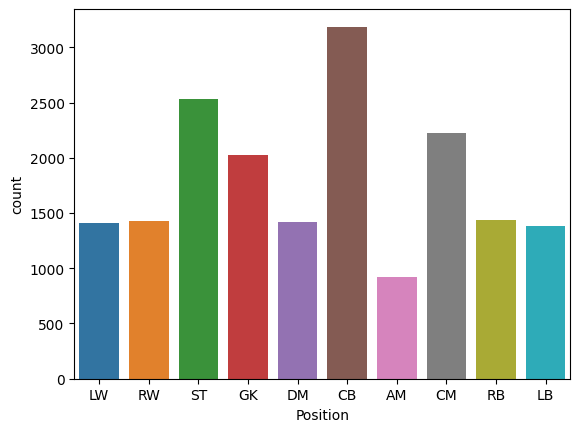

In [28]:
sns.countplot(data=df, x="Position")

In [26]:
df["Marking"].unique()

array(['None'], dtype=object)

In [27]:
df=df.drop("Marking",axis=1)

In [170]:
df

,Height,Weight,Preferred Foot,Age,Weak Foot,Skill Moves,Position,Ball Control,Dribbling,Slide Tackle,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,AWR,DWR
Kylian Mbappé,182,73,Right,24,4,5,LW,91,93,32,...,69,84,83,11,13,5,7,6,3,1
Kevin De Bruyne,181,75,Right,31,5,4,RW,90,86,53,...,83,83,83,10,15,13,5,13,3,2
Robert Lewandowski,185,81,Right,34,4,4,ST,89,85,19,...,85,90,89,8,15,6,12,10,3,2
Karim Benzema,185,81,Right,35,4,4,ST,91,87,18,...,73,84,88,5,13,11,5,7,2,2
Lionel Messi,169,67,Left,35,4,4,RW,93,95,24,...,93,75,88,14,6,11,15,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhao Ziye,180,73,Right,19,3,2,RW,45,47,25,...,35,54,43,12,9,13,13,7,2,2
Zhang Jiahui,182,69,Right,20,3,2,CM,45,42,46,...,35,42,36,11,10,12,9,8,2,2
Deven Sawhney,179,70,Left,21,3,2,LB,35,41,45,...,34,34,25,11,11,12,14,9,3,2
Nathan Logue,178,72,Right,23,3,2,CM,49,47,48,...,37,39,37,10,8,6,7,6,2,2


In [29]:
X = df.drop("Position",axis=1)
y = df["Position"]

In [30]:
X_string=X["Preferred Foot"]

In [31]:
X_numeric=X.drop("Preferred Foot", axis=1)

In [32]:
X_numeric = X_numeric.apply(pd.to_numeric)

In [33]:
X_numeric

,Height,Weight,Age,Weak Foot,Skill Moves,Ball Control,Dribbling,Slide Tackle,Stand Tackle,Aggression,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,AWR,DWR
Kylian Mbappé,182,73,24,4,5,91,93,32,34,64,...,69,84,83,11,13,5,7,6,3,1
Kevin De Bruyne,181,75,31,5,4,90,86,53,66,75,...,83,83,83,10,15,13,5,13,3,2
Robert Lewandowski,185,81,34,4,4,89,85,19,42,81,...,85,90,89,8,15,6,12,10,3,2
Karim Benzema,185,81,35,4,4,91,87,18,24,63,...,73,84,88,5,13,11,5,7,2,2
Lionel Messi,169,67,35,4,4,93,95,24,35,44,...,93,75,88,14,6,11,15,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhao Ziye,180,73,19,3,2,45,47,25,21,26,...,35,54,43,12,9,13,13,7,2,2
Zhang Jiahui,182,69,20,3,2,45,42,46,45,51,...,35,42,36,11,10,12,9,8,2,2
Deven Sawhney,179,70,21,3,2,35,41,45,48,58,...,34,34,25,11,11,12,14,9,3,2
Nathan Logue,178,72,23,3,2,49,47,48,44,51,...,37,39,37,10,8,6,7,6,2,2


In [35]:
X = X_numeric

In [36]:
X["Preferred Foot"]=X_string

In [37]:
X=pd.get_dummies(X, drop_first=True)

In [38]:
X

,Height,Weight,Age,Weak Foot,Skill Moves,Ball Control,Dribbling,Slide Tackle,Stand Tackle,Aggression,...,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,AWR,DWR,Preferred Foot_Right
Kylian Mbappé,182,73,24,4,5,91,93,32,34,64,...,84,83,11,13,5,7,6,3,1,1
Kevin De Bruyne,181,75,31,5,4,90,86,53,66,75,...,83,83,10,15,13,5,13,3,2,1
Robert Lewandowski,185,81,34,4,4,89,85,19,42,81,...,90,89,8,15,6,12,10,3,2,1
Karim Benzema,185,81,35,4,4,91,87,18,24,63,...,84,88,5,13,11,5,7,2,2,1
Lionel Messi,169,67,35,4,4,93,95,24,35,44,...,75,88,14,6,11,15,8,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhao Ziye,180,73,19,3,2,45,47,25,21,26,...,54,43,12,9,13,13,7,2,2,1
Zhang Jiahui,182,69,20,3,2,45,42,46,45,51,...,42,36,11,10,12,9,8,2,2,1
Deven Sawhney,179,70,21,3,2,35,41,45,48,58,...,34,25,11,11,12,14,9,3,2,0
Nathan Logue,178,72,23,3,2,49,47,48,44,51,...,39,37,10,8,6,7,6,2,2,1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [44]:
def model_performance(model):
    model.fit(scaled_X_train,y_train)
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test, preds))
    cm=confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [45]:
from sklearn.model_selection import GridSearchCV

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rfc = RandomForestClassifier()

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

          AM       0.00      0.00      0.00       141
          CB       0.67      0.94      0.78       476
          CM       0.35      0.84      0.49       339
          DM       0.00      0.00      0.00       205
          GK       1.00      1.00      1.00       306
          LB       0.88      0.32      0.47       203
          LW       0.34      0.05      0.09       208
          RB       0.84      0.21      0.34       215
          RW       0.18      0.01      0.02       195
          ST       0.53      0.97      0.69       409

    accuracy                           0.58      2697
   macro avg       0.48      0.43      0.39      2697
weighted avg       0.53      0.58      0.49      2697



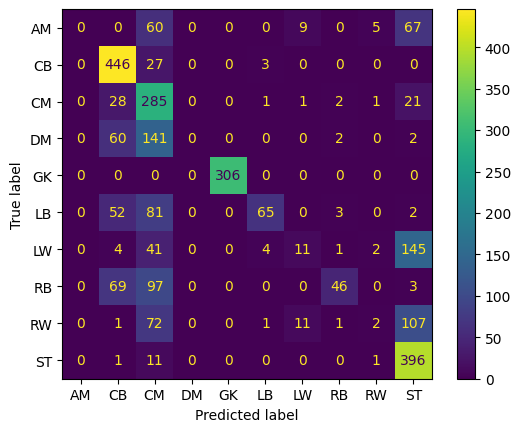

In [210]:
grid_param_rf = {"n_estimators": [40,64,100,128,200],
                 "max_depth" : [2,3,4],
                 "bootstrap":[True]}
grid_rf = GridSearchCV(rfc, grid_param_rf)
model_performance(grid_rf)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

              precision    recall  f1-score   support

          AM       0.62      0.11      0.18       141
          CB       0.88      0.91      0.89       476
          CM       0.45      0.74      0.56       339
          DM       0.55      0.33      0.41       205
          GK       1.00      1.00      1.00       306
          LB       0.69      0.85      0.77       203
          LW       0.48      0.38      0.43       208
          RB       0.75      0.73      0.74       215
          RW       0.39      0.30      0.34       195
          ST       0.83      0.87      0.85       409

    accuracy                           0.70      2697
   macro avg       0.67      0.62      0.62      2697
weighted avg       0.70      0.70      0.69      2697



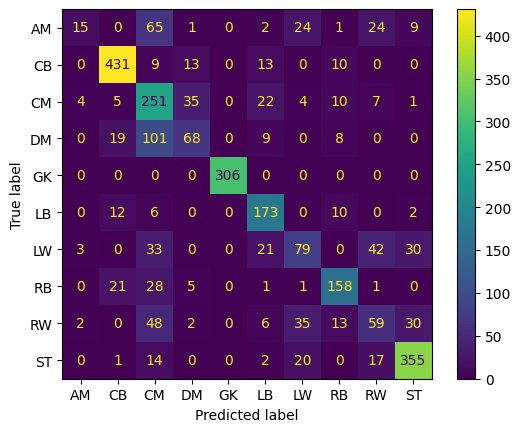

In [82]:
grid_param_knn = {"n_neighbors":[1,5,10,50,90, 100,110,150,200]}
grid_knn=GridSearchCV(knn, grid_param_knn)
model_performance(grid_knn)

In [83]:
grid_knn.best_params_

{'n_neighbors': 100}

In [46]:
from sklearn.svm import LinearSVC

In [47]:
svc = LinearSVC()

              precision    recall  f1-score   support

          AM       0.60      0.23      0.34       141
          CB       0.78      0.93      0.85       476
          CM       0.56      0.67      0.61       339
          DM       0.56      0.24      0.33       205
          GK       0.99      1.00      1.00       306
          LB       0.60      0.81      0.69       203
          LW       0.50      0.34      0.40       208
          RB       0.67      0.80      0.73       215
          RW       0.39      0.15      0.21       195
          ST       0.73      0.95      0.83       409

    accuracy                           0.70      2697
   macro avg       0.64      0.61      0.60      2697
weighted avg       0.67      0.70      0.66      2697



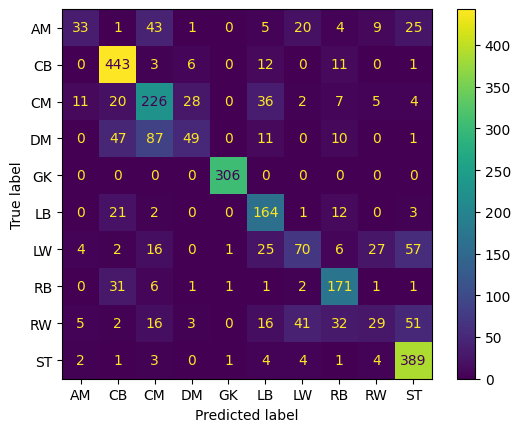

In [48]:
svc_grid_param = {"C":[0.01,0.1,0.5,0.9,1,1.1,2,5],
                  "penalty":["l1", "l2"],
                  "dual":[False], #n_samples>n_features
                 "fit_intercept":[False], #because data is already scaled
                  "class_weight":["balanced", None] #there is some imbalance
                 }
grid_svc=GridSearchCV(svc, svc_grid_param,n_jobs=-1)
model_performance(grid_svc)
                  

In [49]:
grid_svc.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': False,
 'penalty': 'l1'}

In [204]:
from sklearn.ensemble import AdaBoostClassifier

In [205]:
ada = AdaBoostClassifier()

              precision    recall  f1-score   support

          AM       0.38      0.15      0.21       141
          CB       0.59      0.96      0.73       476
          CM       0.47      0.32      0.38       339
          DM       0.37      0.09      0.15       205
          GK       1.00      1.00      1.00       306
          LB       0.50      0.62      0.56       203
          LW       0.29      0.35      0.32       208
          RB       0.48      0.42      0.45       215
          RW       0.23      0.03      0.05       195
          ST       0.65      0.88      0.75       409

    accuracy                           0.58      2697
   macro avg       0.49      0.48      0.46      2697
weighted avg       0.54      0.58      0.53      2697



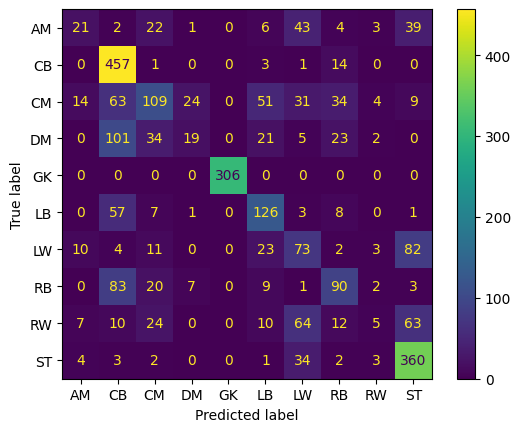

In [220]:
ada_grid_param={"n_estimators":[20,50,60,100],
                "learning_rate":[0.01,0.1,0.5,1,1.1,2]}
grid_ada = GridSearchCV(ada, ada_grid_param)
model_performance(grid_ada)

In [56]:
pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/70.9 MB 1.7 MB/s eta 0:00:43
     ---------------------------------------- 0.2/70.9 MB 1.8 MB/s eta 0:00:39
     ---------------------------------------- 0.2/70.9 MB 1.8 MB/s eta 0:00:40
     ---------------------------------------- 0.3/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.4/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.5/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.6/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.7/70.9 MB 1.9 MB/s eta 0:00:38
     ---------------------------------------- 0.8/70.9 MB 1.9 MB/s eta 0:00:37
     ---------------------------------------- 0.8/70.9 MB 1.9 MB/s eta 0:00:38
      --------------------------------------- 0.9/70.9 MB 1.9 MB/s eta 0:00:38
      --------------------------------------- 1.0/70.9 MB 1

In [57]:
from xgboost import XGBClassifier

In [58]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learnin

In [59]:
xgb = XGBClassifier(objective="multi:softmax",nthread=4)

In [61]:
grid_params_xgb = {'max_depth':range(2,10,1),
               'n_estimators': range(60,220,40),
               'learning_rate': [0.1,0.01,.05]}
grid_xgb = GridSearchCV(xgb, grid_params_xgb)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
grid_xgb.fit(scaled_X_train,y_train_enc)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)})

In [65]:
grid_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 180}

In [64]:
preds = grid_xgb.predict(scaled_X_test)


In [77]:
print(classification_report(le.transform(y_test), preds))


              precision    recall  f1-score   support

           0       0.50      0.31      0.38       141
           1       0.87      0.92      0.90       476
           2       0.60      0.73      0.66       339
           3       0.56      0.47      0.51       205
           4       1.00      1.00      1.00       306
           5       0.85      0.81      0.83       203
           6       0.51      0.43      0.47       208
           7       0.76      0.84      0.80       215
           8       0.42      0.40      0.41       195
           9       0.87      0.88      0.88       409

    accuracy                           0.74      2697
   macro avg       0.69      0.68      0.68      2697
weighted avg       0.74      0.74      0.74      2697



In [71]:
le.classes_

array(['AM', 'CB', 'CM', 'DM', 'GK', 'LB', 'LW', 'RB', 'RW', 'ST'],
      dtype=object)

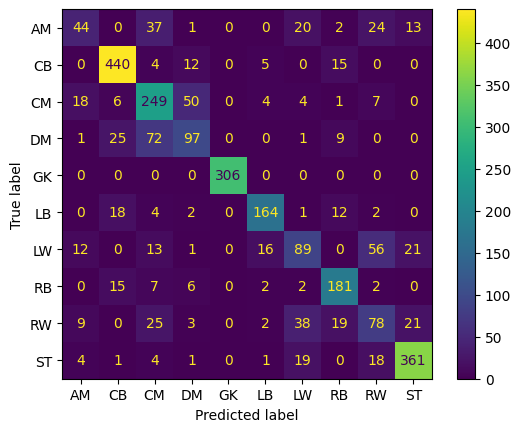

In [75]:
cm=confusion_matrix(le.transform(y_test), preds)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

In [86]:
best_model = XGBClassifier(objective="multi:softmax",nthread=4, learning_rate = 0.05, max_depth= 7, n_estimators = 180,
                          tree_method = 'gpu_hist')

In [87]:
complete_scaled_X = scaler.fit_transform(X)
encoded_y = le.fit_transform(y)
best_model.fit(complete_scaled_X, encoded_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [89]:
import joblib

In [90]:
filename="best_model.joblib"
joblib.dump(best_model, filename)



['best_model.joblib']

In [92]:
loaded_model = joblib.load("best_model.joblib")

In [93]:
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='multi:softmax', ...)